# Studying the molecular mechanism of functional selection for the disordered adenovirus early gene 1A (E1A) protein


In this Jupyter notebook, we are going to analyze global and local features of the E1A protein. In a recent study Gonzalez-Foutel and et al (https://doi.org/10.1038/s41594-022-00811-w), have shown that E1A protein's function depends on 2 short linear motifs (SLiMs) which render the interatcion of the protein to its target. These two SLiMs are connected by a 71-residue disordered linker and one of the goals of the study was elaborating on the sequence-ensemble-functional relationship of this hypervariable linker region. While the multiple sequence alginment (MSA) analysis proved high sequence variability among orthologs of E1A protein with respect to the linker region, analysis of conformational ensembles generated by the atomositic simulations have shown high degree of conservation with respect to the mean end-to-end distance extracted from the ensembles.


In this notebook, we will expand on the analysis presented in this paper, first we are going to visualize the global and local Monte-Carlo (MC) derived ensemble features of 10 different E1A protein orthologs which are published by the authors and then compare them with coarse-grained (CG) MD ensembles generated by CALVADOS. Next, we will analyze and visualize the global and local ensemble features of E1A protein deposited in Protein Ensemble Database (PED) in its monomeric and complex format and compare them with AlphaFold-3 prediction for the complex.



- MD ensemble vs CALVADOS ensemble
- Monomer vs complex


### First step: Importing the modules from IDPET package and Loading the 10 ensembles from MD simulation and CALVADOS 

In this part we first imported the modules from IDPET package and then loaded the ensembles which are 10 MD derived ensembles and 10 ensembles generated by CALVADOS.
As the MD ensembles published by the authors of the paper each contains 500 conformations and the CALVADOS ensembles contain 1000, so we randomly selected 500 conformation from them in order to have a consistent ensembles.  

In [24]:
import sys
import os
sys.path.append('/home/hamid/Desktop/EnsembleTools') # Add the path of the package to the system path for import (SHOULD BE DELETED!)
import matplotlib.pyplot as plt
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import Visualization
linkers_path = "/home/hamid/Downloads/Gonzalez_Foutel_2022/data/linkers"
ea1_var_path = "/home/hamid/Downloads/ea1_variants"
ens_codes = [
    # Ensemble('MC_BAdV2_27',data_path=os.path.join(linkers_path,'OA_BAdV2_linker/subtraj_500.xtc'),top_path=os.path.join(linkers_path,'OA_BAdV2_linker/full.pdb'), residue_range=[3,29]),
    # Ensemble('C_BAdV2_27',data_path=os.path.join(ea1_var_path,'OA_BAdV2_IDRLab/SIMULATION/traj.dcd'),top_path=os.path.join(ea1_var_path,'OA_BAdV2_IDRLab/SIMULATION/top.pdb')),
    # Ensemble('MC_BAdV1_28',data_path=os.path.join(linkers_path,'BA_BAdV1_linker/subtraj_500.xtc'),top_path= os.path.join(linkers_path,'BA_BAdV1_linker/full.pdb')),
    # Ensemble('C_BAdV1_28',data_path=os.path.join(ea1_var_path,'BA_BAdV1_IDRLab/SIMULATION/traj.dcd'),top_path=os.path.join(ea1_var_path,'BA_BAdV1_IDRLab/SIMULATION/top.pdb')),
    # Ensemble('_41_ranch_1',data_path='/home/hamid/Desktop/ranch_test/pool_41_pdb'),
    # Ensemble('_41_ranch_1_rand_2',data_path='/home/hamid/Desktop/ranch_test/pool_41_rand_2_pdb'),
    # Ensemble('_41_ranch_1_rand_3',data_path='/home/hamid/Desktop/ranch_test/pool_41_rand_3_pdb'),
    # Ensemble('_41_ranch_rand_1',data_path='/home/hamid/Desktop/ranch_test/pool_41_rand_1_pdb'),
    # Ensemble('_glycine_',data_path='/home/hamid/Desktop/ranch_test/pool_glycine_41_pdb'),
    # Ensemble('_alanine_',data_path='/home/hamid/Desktop/ranch_test/pool_alanine_41_pdb'),
    # Ensemble('MC_HAdV52_41',data_path=os.path.join(linkers_path,'HG_HAdV52_linker/subtraj_500.xtc'),top_path=os.path.join(linkers_path,'HG_HAdV52_linker/full.pdb'), residue_range=(2,42)),
    # Ensemble('C_HAdV52_41',data_path=os.path.join(ea1_var_path,'HG_HAdV52_IDRLab/SIMULATION/traj.dcd'),top_path=os.path.join(ea1_var_path,'HG_HAdV52_IDRLab/SIMULATION/top.pdb')),
    
    # Ensemble('MC_HAdV40_48',data_path=os.path.join(linkers_path,'HF_HAdV40_linker/subtraj_500.xtc'),top_path=os.path.join(linkers_path,'HF_HAdV40_linker/full.pdb'), residue_range=(2,49)),
    # Ensemble('C_HAdV40_48',data_path=os.path.join(ea1_var_path,'HF_HAdV40_IDRLab/SIMULATION/traj.dcd'),top_path=os.path.join(ea1_var_path,'HF_HAdV40_IDRLab/SIMULATION/top.pdb')),
    # Ensemble('MC_SAdV3_52',data_path=os.path.join(linkers_path,'SA_SAdV3_linker/subtraj_500.xtc'),top_path=os.path.join(linkers_path,'SA_SAdV3_linker/full.pdb'), residue_range=(2,53)),
    # Ensemble('C_SAdV3_52',data_path=os.path.join(ea1_var_path,'SA_SAdV3_IDRLab/SIMULATION/traj.dcd'),top_path=os.path.join(ea1_var_path,'SA_SAdV3_IDRLab/SIMULATION/top.pdb')),
    # # Ensemble('_56_ranch_',data_path='/home/hamid/Desktop/ranch_test/pool_56_pdb'),
    # Ensemble('MC_CAdV1_56',data_path=os.path.join(linkers_path,'CA_CAdV1_linker/subtraj_500.xtc'),top_path=os.path.join(linkers_path,'CA_CAdV1_linker/full.pdb'), residue_range=(2,57)),
    # Ensemble('C_CAdV1_56',data_path=os.path.join(ea1_var_path,'CA_CAdV1_IDRLab/SIMULATION/traj.dcd'),top_path=os.path.join(ea1_var_path,'CA_CAdV1_IDRLab/SIMULATION/top.pdb')),
    # Ensemble('MC_BtAdV2_57',data_path=os.path.join(linkers_path,'BtB_BtAdV2_linker/subtraj_500.xtc'),top_path=os.path.join(linkers_path,'BtB_BtAdV2_linker/full.pdb'), residue_range=(2,58)),
    # Ensemble('C_BtAdV2_57',data_path=os.path.join(ea1_var_path,'BtB_BtAdV2_IDRLab/SIMULATION/traj.dcd'),top_path=os.path.join(ea1_var_path,'BtB_BtAdV2_IDRLab/SIMULATION/top.pdb')),
    # Ensemble('MC_SAdV22_61',data_path=os.path.join(linkers_path,'HE_SAdV22_linker/subtraj_500.xtc'),top_path=os.path.join(linkers_path,'HE_SAdV22_linker/full.pdb'), residue_range=(2,62)),
    # Ensemble('C_SAdV22_61',data_path=os.path.join(ea1_var_path,'HE_SAdV22_IDRLab/SIMULATION/traj.dcd'),top_path=os.path.join(ea1_var_path,'HE_SAdV22_IDRLab/SIMULATION/top.pdb')),
    Ensemble('MC_HAdV5_71',data_path=os.path.join(linkers_path,'HC_HAdV5_linker/subtraj_500.xtc'),top_path=os.path.join(linkers_path,'HC_HAdV5_linker/full.pdb'),residue_range=(2,72)),
    Ensemble('_71_ranch',data_path='/home/hamid/cif_pdb_human'),
    # # Ensemble('_71_ranch_gly',data_path='/home/hamid/Desktop/ranch_test/pool_71_gly_pdb'),
    Ensemble('C_HAdV5_71',data_path=os.path.join(ea1_var_path,'HC_HAdV5_IDRLab/SIMULATION/traj.dcd'),top_path=os.path.join(ea1_var_path,'HC_HAdV5_IDRLab/SIMULATION/top.pdb')),
    # Ensemble('MC_HAdV18_75',data_path=os.path.join(linkers_path,'HA_HAdV18_linker/subtraj_500.xtc'),top_path=os.path.join(linkers_path,'HA_HAdV18_linker/full.pdb'), residue_range=(2,76)),
    # # Ensemble('_75_ranch', data_path='/home/hamid/Desktop/ranch_test/pool_75_pdb'),
    # Ensemble('C_HAdV18_75',data_path=os.path.join(ea1_var_path,'HA_HAdV18_IDRLab/SIMULATION/traj.dcd'),top_path=os.path.join(ea1_var_path,'HA_HAdV18_IDRLab/SIMULATION/top.pdb'))
    
]
data_dir = '/home/hamid/PED_Data_analysis/nikola' 

analysis = EnsembleAnalysis(ens_codes, data_dir)

analysis.load_trajectories() 
analysis.random_sample_trajectories(sample_size=500)
# analysis.load_trajectories() 
vis = Visualization(analysis=analysis) 

Loading trajectory for MC_HAdV5_71...
Selected residues from ensemble MC_HAdV5_71
_71_ranch chain ids: ['A']
Generating trajectory for _71_ranch...
Generated trajectory saved to /home/hamid/PED_Data_analysis/nikola.
Loading trajectory for C_HAdV5_71...
Selected residues from ensemble MC_HAdV5_71
500 conformations sampled from MC_HAdV5_71 trajectory.
500 conformations sampled from _71_ranch trajectory.
500 conformations sampled from C_HAdV5_71 trajectory.


### Summary table
Before delving into the analysis, we can use  `get_features_summary_dataframe()` method to obtain a useful summary of information about the ensembles. This method will provide us with a summary table.

In [25]:
analysis.get_features_summary_dataframe()

,ensemble_code,n_residues,n_conformers,rg_mean,rg_std,asphericity_mean,asphericity_std,prolateness_mean,prolateness_std,sasa_mean,sasa_std,end_to_end_mean,end_to_end_std,flory_exponent,flory_exponent_err
0,MC_HAdV5_71,71,500,1.982512,0.476901,0.388957,0.192965,0.158061,0.122032,73.446541,6.908022,4.689291,1.877166,0.508101,0.002922
1,_71_ranch,71,500,2.381940,0.479793,0.444484,0.197123,0.189191,0.155296,50.308617,1.014230,5.751720,2.125839,0.566277,0.002691
2,C_HAdV5_71,71,500,2.505887,0.499343,0.434802,0.194215,0.181886,0.147934,52.997635,0.377862,6.165495,2.246926,0.577506,0.001501


### MC ensembles vs CALVADOS ensembles:

In this step using the `ax` parameter of each visualization functions we plotted the distribution of radius of gyrations, normalized end-to-end distances and asphericity in one plot. Based on these plots we can confirm the findings of the study related to the conservation of the end to end distances among different orthologs althouth their number of residues varies from 27-75. Morover, we can confirm the application of CALVADOS to replicate the same result and show case how the package can analyze CG ensembles.  Explain each violin plot

In this step we first simply calculated the mean end-to-end distances, rg and asphericity for MC-based ensembles and CALVADOS ensembles separately

In [11]:
import numpy as np
def compute_feature_means(feature_name):
    feature = analysis.get_features(feature_name)
    feat_MC = []
    feat_C = []
    for key in feature:
        if 'MC' in key:
            feat_MC.append(feature[key])
        else:
            feat_C.append(feature[key])
    mean_MC = np.mean(np.concatenate(feat_MC))
    mean_C = np.mean(np.concatenate(feat_C))
    return mean_MC, mean_C

# List of feature names we want to analyze
features = ['end_to_end', 'rg', 'asphericity'] 

# Dictionary to store the means
feature_means = {}

# Populate the dictionary
for feature in features:
    mean_MC, mean_C = compute_feature_means(feature)
    feature_means[feature] = (mean_MC, mean_C)
    print(f'Mean {feature} for sub-sampled MC generated conformations is {mean_MC:.2f}')
    print(f'Mean {feature} for sub-sampled CALVADOS generated conformations is {mean_C:.2f}')


Mean end_to_end for sub-sampled MC generated conformations is 4.66
Mean end_to_end for sub-sampled CALVADOS generated conformations is 4.57
Mean rg for sub-sampled MC generated conformations is 1.81
Mean rg for sub-sampled CALVADOS generated conformations is 1.84
Mean asphericity for sub-sampled MC generated conformations is 0.49
Mean asphericity for sub-sampled CALVADOS generated conformations is 0.48


In this step we visualized the distributions of features and show the mean for CALVADOS and MC based ensembles

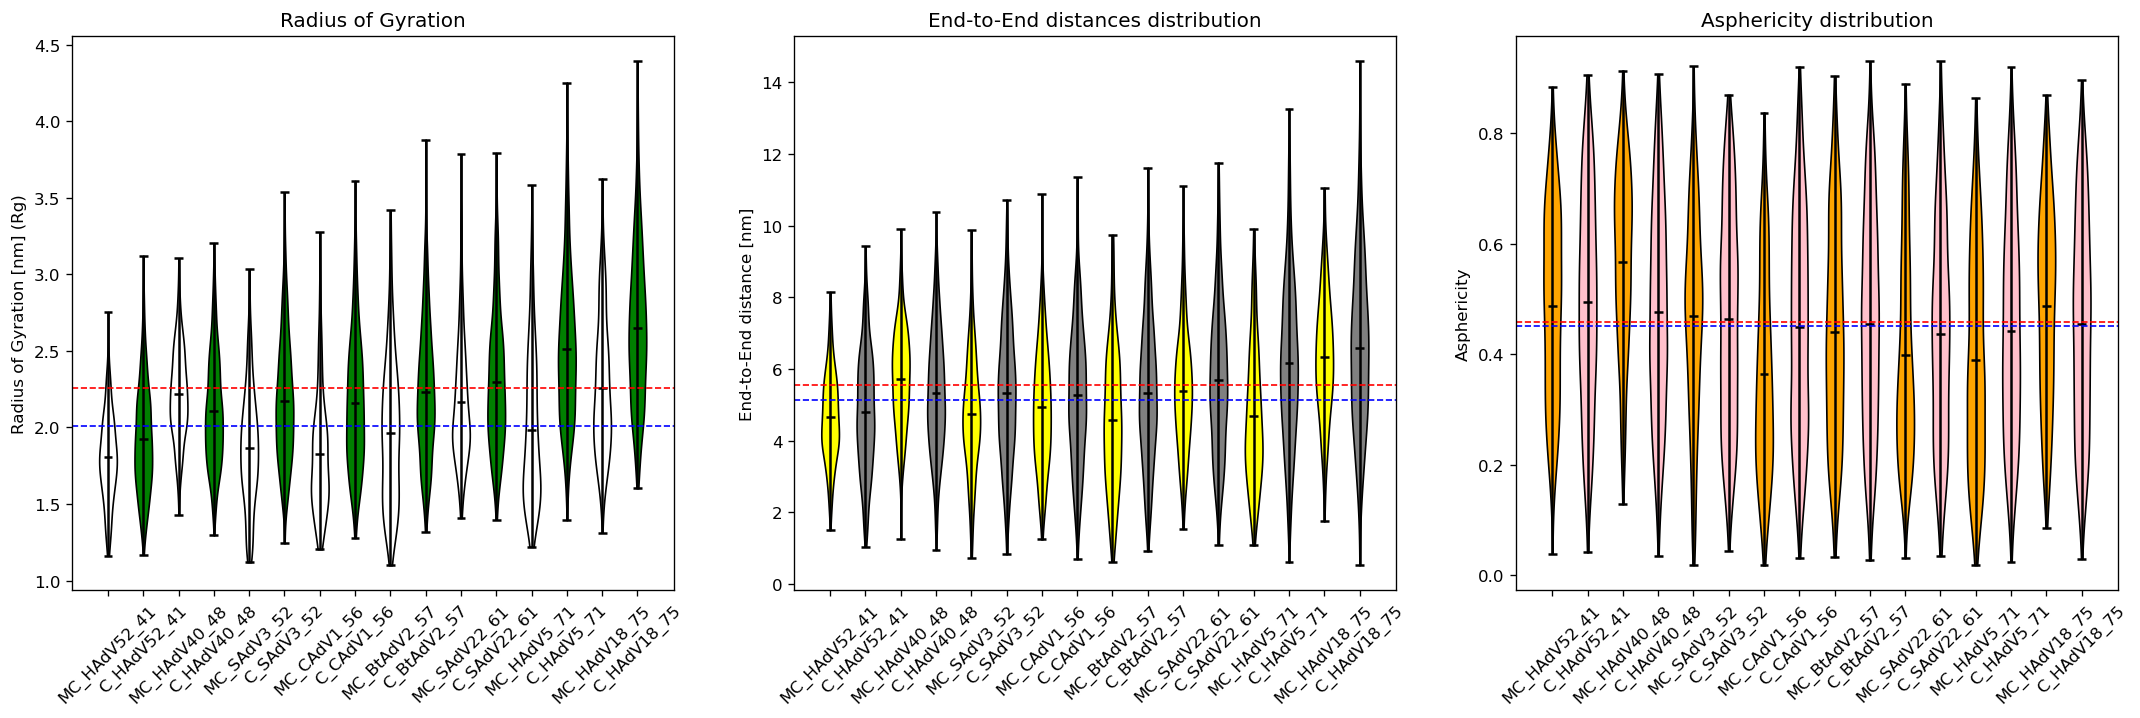

In [189]:
fig , ax = plt.subplots(1, 3, figsize=(22.0, 6), dpi=120)
vis.radius_of_gyration(violin_plot=True ,location='mean', ax = ax[0], color='g');
vis.end_to_end_distances(violin_plot=True, rg_norm=False,location='mean', ax=ax[1], color='w');
vis.asphericity(violin_plot=True, location='mean', ax=ax[2], color='orange');

colors = ['white', 'g']
for i, pc in enumerate(ax[0].collections):
    pc.set_facecolor(colors[i % len(colors)])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
ax[0].axhline(y=feature_means['rg'][1], color='r', linestyle='--', linewidth=1, label='mean Calvados Rg')
ax[0].axhline(y=feature_means['rg'][0], color='b', linestyle='--', linewidth=1, label='mean MC Rg')


colors = ['yellow', 'gray']
for i, pc in enumerate(ax[1].collections):
    pc.set_facecolor(colors[i % len(colors)])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
ax[1].axhline(y=feature_means['end_to_end'][1], color='r', linestyle='--', linewidth=1, label='mean Calvados Re')
ax[1].axhline(y=feature_means['end_to_end'][0], color='b', linestyle='--', linewidth=1, label='mean MC Re')


colors = ['orange', 'pink']
for i, pc in enumerate(ax[2].collections):
    pc.set_facecolor(colors[i % len(colors)])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
ax[2].axhline(y=feature_means['asphericity'][1], color='r', linestyle='--', linewidth=1, label='mean Calvados Asph')
ax[2].axhline(y=feature_means['asphericity'][0], color='b', linestyle='--', linewidth=1, label='mean MC Asph')


### Monomer vs complex
In this step we are going to analyze PED ensembles for EA1 protein in monomer(PED00175) and complex(PED00175) states. We have 10 different ensembles in PED for each state, however in this notebook we just visualize three of them with specific focus on the linker part (residue 16-87). Furthermore, we also used AF3 portal to predict the EA1 when it is in complex with its target. AF3 can generate 5 complexes for the provided sequences. We then analyze the EA1 chain in those 5 models in terms of global features (only the linker region).    

### First step: Loading the PED ensembles in monomer (PED00175) and complex (PED00174) states 

In [83]:
import sys
import os
sys.path.append('/home/hamid/Desktop/EnsembleTools') # Add the path of the package to the system path for import (SHOULD BE DELETED!)
import matplotlib.pyplot as plt
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import Visualization
ens_codes_PED = [
    Ensemble('PED00174e001', database='ped', chain_id='B', residue_range=(16,87)), 
    Ensemble('PED00174e002', database='ped', chain_id='B', residue_range=(16,87)), 
    Ensemble('PED00174e003', database='ped', chain_id='B', residue_range=(16,87)),
    Ensemble('PED00174e004', database='ped', chain_id='B', residue_range=(16,87)), 
    Ensemble('PED00174e005', database='ped', chain_id='B', residue_range=(16,87)), 
    Ensemble('PED00174e006', database='ped', chain_id='B', residue_range=(16,87)),
    Ensemble('PED00174e007', database='ped', chain_id='B', residue_range=(16,87)), 
    Ensemble('PED00174e008', database='ped', chain_id='B', residue_range=(16,87)), 
    Ensemble('PED00174e009', database='ped', chain_id='B', residue_range=(16,87)),
    Ensemble('PED00174e010', database='ped', chain_id='B', residue_range=(16,87)), 
    Ensemble('PED00175e001', database='ped', chain_id='A', residue_range=(16,87)),
    Ensemble('PED00175e002', database='ped', chain_id='A', residue_range=(16,87)), 
    Ensemble('PED00175e003', database='ped', chain_id='A', residue_range=(16,87)),
    Ensemble('PED00175e004', database='ped', chain_id='A', residue_range=(16,87)), 
    Ensemble('PED00175e005', database='ped', chain_id='A', residue_range=(16,87)), 
    Ensemble('PED00175e006', database='ped', chain_id='A', residue_range=(16,87)),
    Ensemble('PED00175e007', database='ped', chain_id='A', residue_range=(16,87)), 
    Ensemble('PED00175e008', database='ped', chain_id='A', residue_range=(16,87)), 
    Ensemble('PED00175e009', database='ped', chain_id='A', residue_range=(16,87)),
    Ensemble('PED00175e010', database='ped', chain_id='A', residue_range=(16,87)),
    # Ensemble('Af3_linker',data_path= '/home/hamid/Downloads/af_wt_pdb_linker/linker_wt_monomer.pdb', residue_range=(16,87)),
    # Ensemble('Af3_linker_bov_1',data_path= '/home/hamid/Downloads/linker_bov_1/bov_1_linker.pdb', residue_range=(22,48)),
    
]
data_dir = '/home/hamid/PED_Data_analysis/nikola' 

analysis_PED = EnsembleAnalysis(ens_codes_PED, data_dir);
analysis_PED.load_trajectories(); 

vis_PED = Visualization(analysis=analysis_PED); 

Ensemble PED00174e001 already downloaded. Skipping.
File PED00174e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00174e001.
Ensemble PED00174e002 already downloaded. Skipping.
File PED00174e002.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00174e002.
Ensemble PED00174e003 already downloaded. Skipping.
File PED00174e003.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00174e003.
Ensemble PED00174e004 already downloaded. Skipping.
File PED00174e004.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00174e004.
Ensemble PED00174e005 already downloaded. Skipping.
File PED00174e005.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00174e005.
Ensemble PED00174e006 already downloaded. Skipping.
File PED00174e006.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble 

### Second step: Loading the AlphaFold3 predicted complex aand select only EA1 chain (Chain A) 

In [41]:
ens_codes_AF_bov_1 = [
Ensemble('AlphaFold3_bov_1', data_path= '/home/hamid/Downloads/bov_1/bov_1.pdb', chain_id='A', residue_range=(22,48) )
]
analysis_AF3_bov_1 = EnsembleAnalysis(ens_codes_AF_bov_1, data_dir)
analysis_AF3_bov_1.load_trajectories(); 

AlphaFold3_bov_1 chain ids: ['A', 'B']
Generating trajectory for AlphaFold3_bov_1...
Chain A selected from ensemble AlphaFold3_bov_1.
Generated trajectory saved to /home/hamid/PED_Data_analysis/nikola.
Selected residues from ensemble AlphaFold3_bov_1


In [42]:
ens_codes_AF = [
Ensemble('AlphaFold3', data_path= '/home/hamid/Downloads/alphafold3/ensemble.pdb', chain_id='A', residue_range=(16,87) )
]
analysis_AF3 = EnsembleAnalysis(ens_codes_AF, data_dir)
analysis_AF3.load_trajectories(); 

AlphaFold3 chain ids: ['A', 'B']
Generating trajectory for AlphaFold3...
Chain A selected from ensemble AlphaFold3.
Generated trajectory saved to /home/hamid/PED_Data_analysis/nikola.
Selected residues from ensemble AlphaFold3


In [43]:
ens_codes_AF = [
Ensemble('AlphaFold3', data_path= '/home/hamid/Downloads/af_proline',chain_id='A' ,residue_range=(16,87) )
]
analysis_AF3 = EnsembleAnalysis(ens_codes_AF, data_dir)
analysis_AF3.load_trajectories(); 

AlphaFold3 chain ids: ['A', 'B']
Generating trajectory for AlphaFold3...
Chain A selected from ensemble AlphaFold3.
Generated trajectory saved to /home/hamid/PED_Data_analysis/nikola.
Selected residues from ensemble AlphaFold3


/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [44]:
ens_codes_AF_dog = [
Ensemble('AlphaFold3_dog', data_path= '/home/hamid/Downloads/af3_dog/ensemble_dog.pdb', chain_id='A', residue_range=(22,78) )
]
analysis_AF3_dog = EnsembleAnalysis(ens_codes_AF_dog, data_dir)
analysis_AF3_dog.load_trajectories(); 

AlphaFold3_dog chain ids: ['A', 'B']
Generating trajectory for AlphaFold3_dog...
Chain A selected from ensemble AlphaFold3_dog.
Generated trajectory saved to /home/hamid/PED_Data_analysis/nikola.
Selected residues from ensemble AlphaFold3_dog


### Third step: Extracting the global features regarding AlphaFold3 predicted complex (only EA1 chain (Chain A)) 

In [45]:
af_ee = analysis_AF3.get_features(featurization='end_to_end')
af_ee_dog = analysis_AF3_dog.get_features(featurization='end_to_end')
af_ee_bov_1 = analysis_AF3_bov_1.get_features(featurization='end_to_end')


### Fourth step: Visualization of the global feature distributions

In this step using ax parameter implemented in visulization functions we plotted the distributions of Rg , end-to-end distances and asphericity in one plot. Based on these plots we can conclude that while in monomeric state EA1 has more extended distribution for these three global features, in complex state a narrower distribution has been sampled. Moreover, AF3 structures shows a good agreement in terms of end-to-end distances and asphericity to the experimentally restrained PED ensembles.  

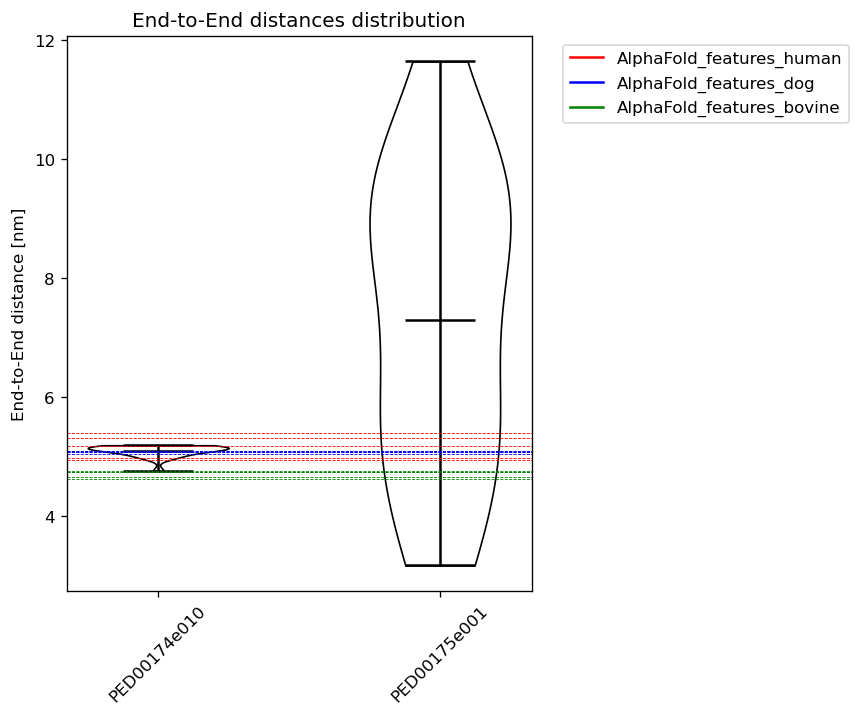

In [46]:
import matplotlib.lines as mlines
fig, ax = plt.subplots(1, 1, figsize=(5, 6), dpi=120)
af_rgs = analysis_AF3.get_features(featurization='rg')

vis_PED.end_to_end_distances(rg_norm=False,location='mean', ax=ax, color='w');

for ee in af_ee['AlphaFold3']:
    ax.axhline(y=ee, color='r', linestyle='--', linewidth=0.5)

for ee in af_ee_dog['AlphaFold3_dog']:
    ax.axhline(y=ee, color='b', linestyle='--', linewidth=0.5)

for ee in af_ee_bov_1['AlphaFold3_bov_1']:
    ax.axhline(y=ee, color='green', linestyle='--', linewidth=0.5)


colors = ['white','white' ,'white' ,'pink','pink' ,'pink'   ]

for i, pc in enumerate(ax.collections):
    pc.set_facecolor(colors[i % len(colors)])
    pc.set_edgecolor('black')
    pc.set_alpha(1)
line_proxy_1 = mlines.Line2D([], [], color='r', linestyle='-', label='AlphaFold_features_human')
line_proxy_2 = mlines.Line2D([], [], color='b', linestyle='-', label='AlphaFold_features_dog')
line_proxy_3 = mlines.Line2D([], [], color='g', linestyle='-', label='AlphaFold_features_bovine')
plt.legend(handles=[line_proxy_1, line_proxy_2, line_proxy_3], loc='best', bbox_to_anchor=(0.7, 0.5, 1, 0.5) )
plt.show()


### Flory exponent analysis: 
Regarding to the lower amount of flory exponent for the EA1 protein when it is in complex, I think this is related to the sampling the specific structures with certain chracteristics (specific Rg and Asphericity and ee) thats why the degree of freedom in these ensembles is quite low. 

In [212]:
v_values = analysis_PED.get_features("flory_exponent")
v_values

{'PED00174e001': 0.4006788258676407,
 'PED00174e002': 0.3973833990219688,
 'PED00174e003': 0.41147242162249964,
 'PED00174e004': 0.40204998115016394,
 'PED00174e005': 0.4235254538446294,
 'PED00174e006': 0.4305699645668055,
 'PED00174e007': 0.40193116806607543,
 'PED00174e008': 0.41020723881849813,
 'PED00174e009': 0.4007760048256587,
 'PED00174e010': 0.42345359896063534,
 'PED00175e001': 0.6527919678672027,
 'PED00175e002': 0.6539260822412981,
 'PED00175e003': 0.699267115405077,
 'PED00175e004': 0.630192396864493,
 'PED00175e005': 0.6239626087936428,
 'PED00175e006': 0.6179458951350271,
 'PED00175e007': 0.6906654158398929,
 'PED00175e008': 0.6670435734093553,
 'PED00175e009': 0.6698399057128707,
 'PED00175e010': 0.652755009801812}

### Ensemble comparison methods: 

Based Jensen-Shannon divergence score on the ditribution of Alpha angles and intera molecular distances between CA atoms we can confirm how different the ensembles in monomer and complex states are. 

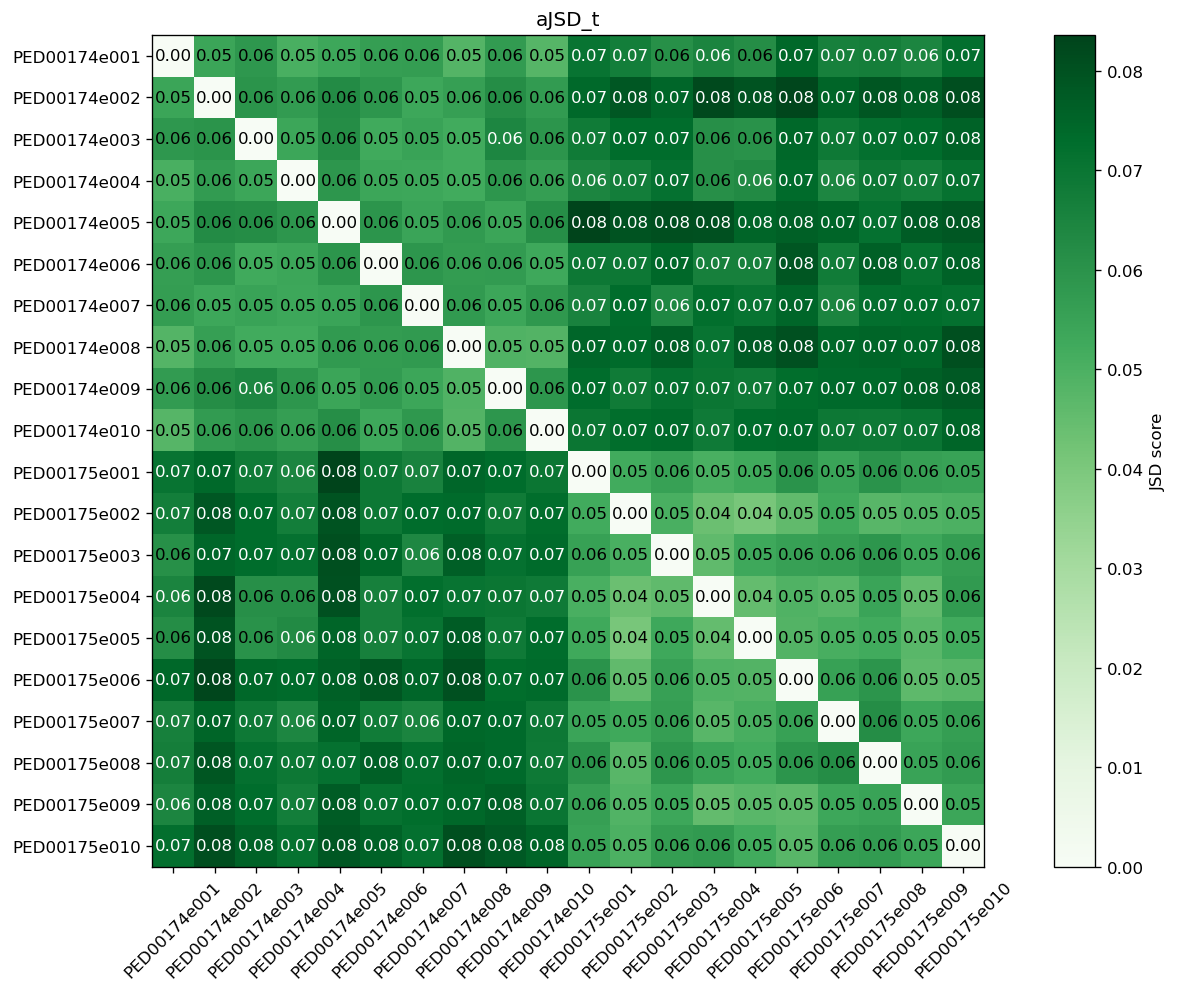

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(15.0, 9), dpi=120)
vis_PED.comparison_matrix(
    score="jsd",
    feature="alpha_angle", # Comparing the ensembls using distribution of alpha angles
    bootstrap_iters=0,
    bins="auto",
    ax=ax,
    cmap="Greens",
    verbose=False
);


<Axes: xlabel='Residue Index', ylabel='Site-specific flexibility parameter'>

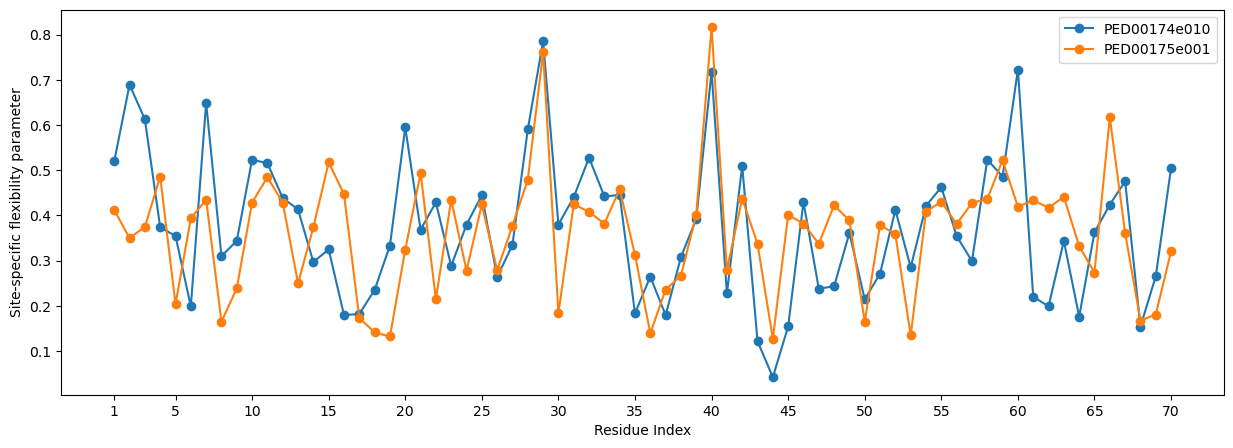

In [49]:
vis_PED.ss_flexibility_parameter()

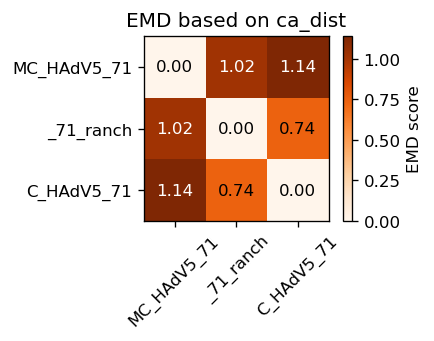

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2), dpi=120)
vis.comparison_matrix(
    score="emd", 
    feature="ca_dist", # Comparing the ensembls using the ditribution of distances between carbon alpha atoms
    bootstrap_iters=0,
    bins="auto",
    ax=ax,# using ax parameter you can decide how to put each subplot on the figure
    cmap="Oranges",
    verbose=False
);

# Scoring 'emd' using features 'ca_dist'
- Distance function for comparing: rmsd
- Will perform: 190 (pairs of ensembles) x 1 (iterations) = 190 (comparisons)


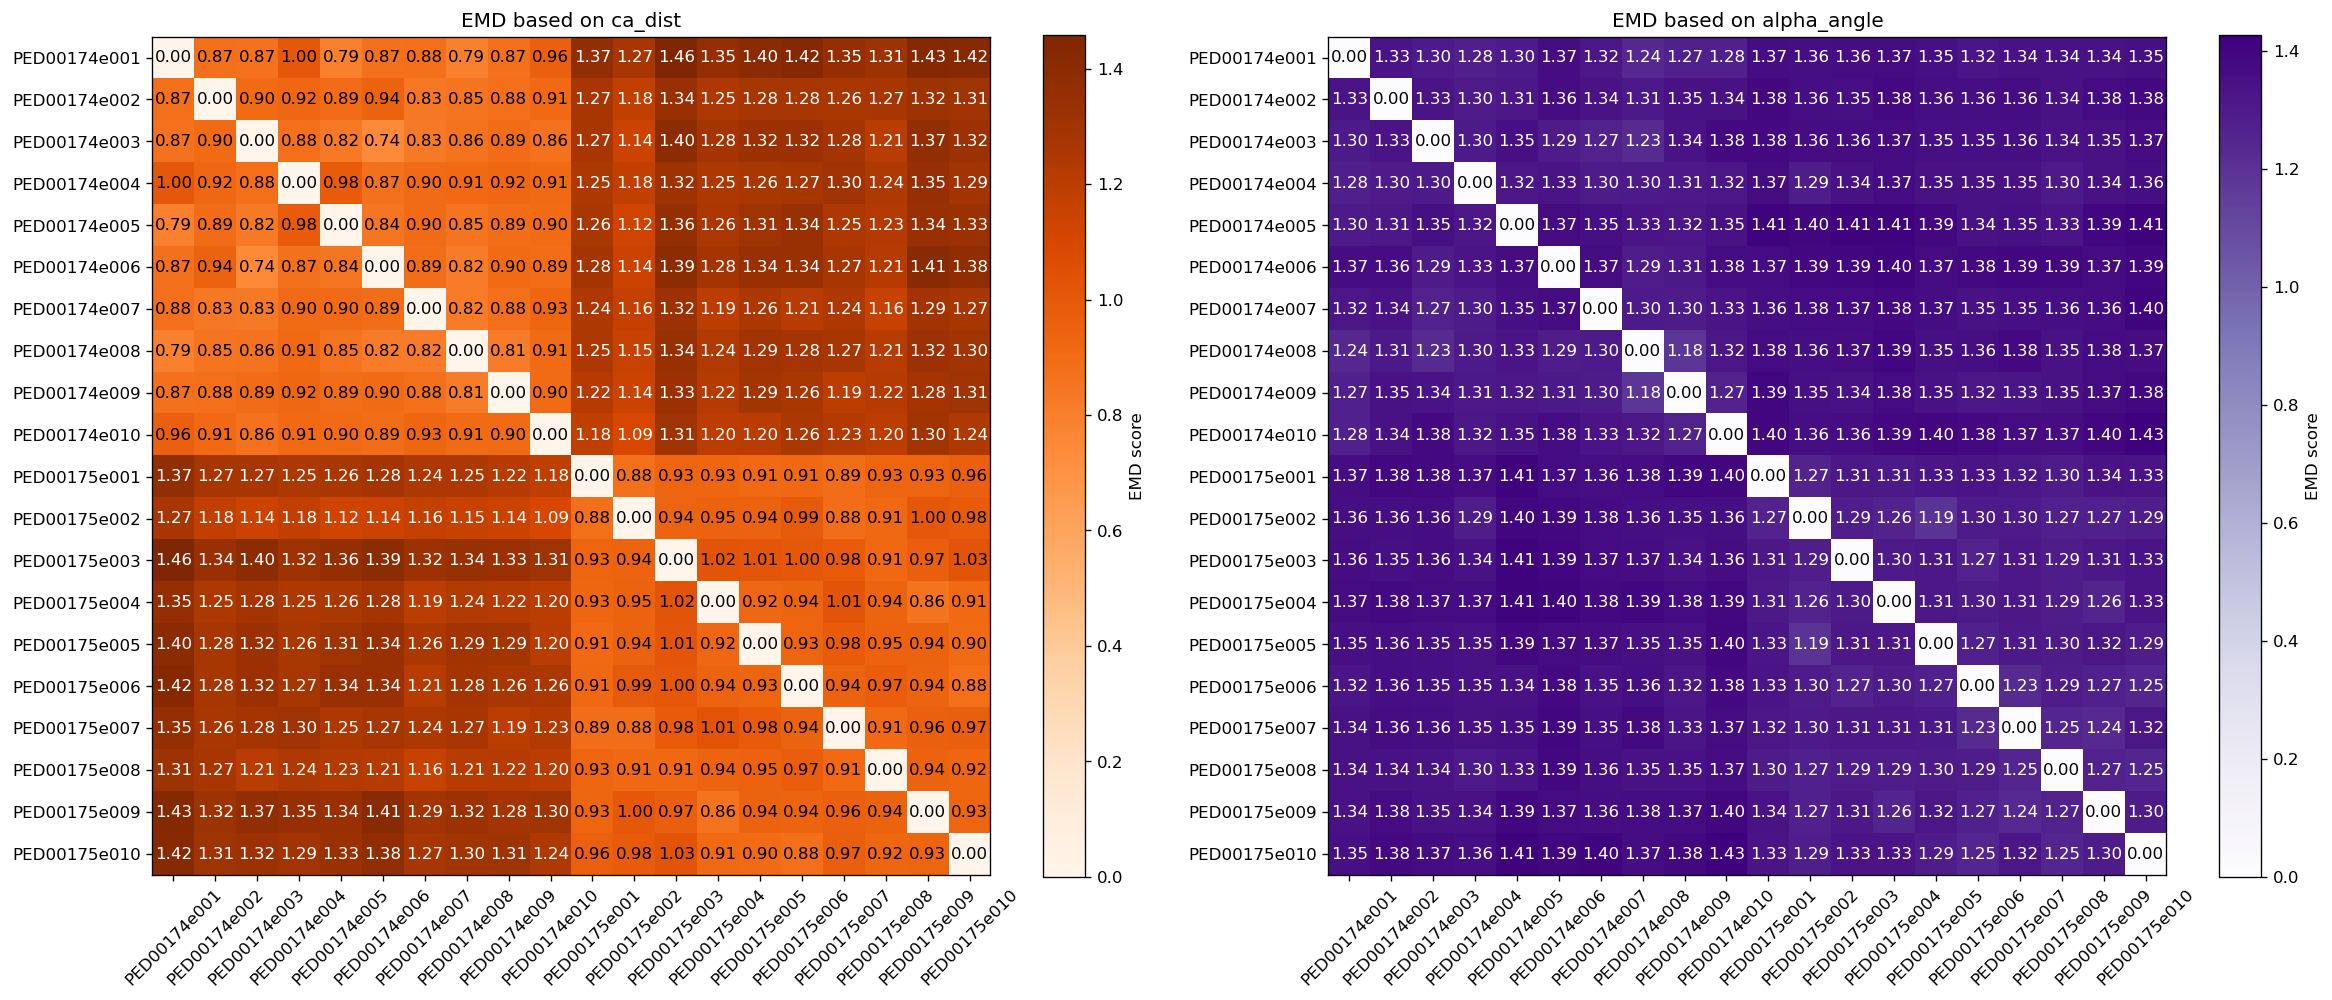

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20.0, 8), dpi=120) # making subplots to generate multiple ax figure

vis_PED.comparison_matrix(
    score="emd", 
    feature="ca_dist", # Comparing the ensembls using the ditribution of distances between carbon alpha atoms
    bootstrap_iters=0,
    bins="auto",
    ax=ax[0], # using ax parameter you can decide how to put each subplot on the figure
    cmap="Oranges",
    verbose=True
)

vis_PED.comparison_matrix(
    score="emd",
    feature="alpha_angle", # Comparing the ensembls using distribution of alpha angles
    bootstrap_iters=0,
    bins="auto",
    ax=ax[1],
    cmap="Purples",
    verbose=False
)

plt.tight_layout()
plt.show()

## Dimensionality reduction Analysis:

Using IDPET `EnsembleAnalysis` module you can use dimensionality reduction methods to investigate more on the extracted local(phi-psi angles) and distance data(CA distances). Here we want to use t-SNE method to visualize the conformers in a 2D space based on selected features like Ca-distances or angles. Using this strategy we can provide more evidence regarding how these two groups of ensembles are different from each other. 

Major findings: 

- Monomer and complex ensembles are not different in terms of CA atoms distance ditribution
- more clearer diferences can be captured between these two groups of the ensembles in terms of phi-psi angles distributions

In [68]:
analysis_PED.extract_features(featurization='ca_dist');


Performing feature extraction for Ensemble: PED00174e001.
Transformed ensemble shape: (20, 2485)
Performing feature extraction for Ensemble: PED00174e002.
Transformed ensemble shape: (20, 2485)
Performing feature extraction for Ensemble: PED00174e003.
Transformed ensemble shape: (20, 2485)
Performing feature extraction for Ensemble: PED00174e004.
Transformed ensemble shape: (20, 2485)
Performing feature extraction for Ensemble: PED00174e005.
Transformed ensemble shape: (20, 2485)
Performing feature extraction for Ensemble: PED00174e006.
Transformed ensemble shape: (20, 2485)
Performing feature extraction for Ensemble: PED00174e007.
Transformed ensemble shape: (20, 2485)
Performing feature extraction for Ensemble: PED00174e008.
Transformed ensemble shape: (20, 2485)
Performing feature extraction for Ensemble: PED00174e009.
Transformed ensemble shape: (20, 2485)
Performing feature extraction for Ensemble: PED00174e010.
Transformed ensemble shape: (20, 2485)
Performing feature extraction 

In [70]:
analysis_PED.reduce_features(method='tsne', perplexity_vals = [10, 20, 50, 80, 100], circular=False, range_n_clusters=range(2,10,1));

Concatenated featurized ensemble shape: (400, 2485)
tsne is running...
Best Perplexity: 50
Best Number of Clusters: 3


/home/hamid/Desktop/EnsembleTools/dpet/visualization.py:327: UserWarning: The following kwargs were not used by contour: 'label'
  ax[3].contour(xi, yi, zi.reshape(xi.shape), levels=5, alpha=0.5, label=f'Ensemble {label}', colors=[label_colors[label]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


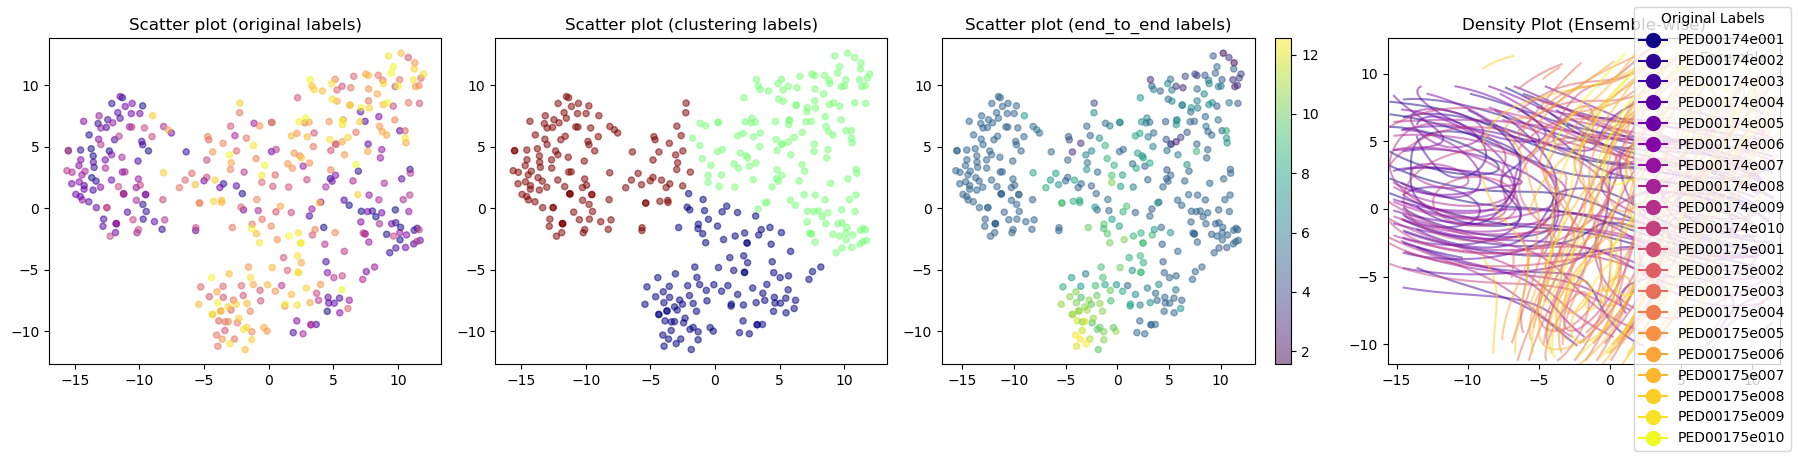

In [71]:

vis_PED.dimensionality_reduction_scatter(size=20,color_by='end_to_end', kde_by_ensemble=True);

In [72]:
analysis_PED.extract_features(featurization='phi_psi');

Performing feature extraction for Ensemble: PED00174e001.
Transformed ensemble shape: (20, 142)
Performing feature extraction for Ensemble: PED00174e002.
Transformed ensemble shape: (20, 142)
Performing feature extraction for Ensemble: PED00174e003.
Transformed ensemble shape: (20, 142)
Performing feature extraction for Ensemble: PED00174e004.
Transformed ensemble shape: (20, 142)
Performing feature extraction for Ensemble: PED00174e005.
Transformed ensemble shape: (20, 142)
Performing feature extraction for Ensemble: PED00174e006.
Transformed ensemble shape: (20, 142)
Performing feature extraction for Ensemble: PED00174e007.
Transformed ensemble shape: (20, 142)
Performing feature extraction for Ensemble: PED00174e008.
Transformed ensemble shape: (20, 142)
Performing feature extraction for Ensemble: PED00174e009.
Transformed ensemble shape: (20, 142)
Performing feature extraction for Ensemble: PED00174e010.
Transformed ensemble shape: (20, 142)
Performing feature extraction for Ensemb

In [73]:
analysis_PED.reduce_features(method='tsne', perplexity_vals = [10, 20, 50, 80, 100], circular=True, range_n_clusters=range(2,10,1));

Concatenated featurized ensemble shape: (400, 142)
tsne is running...
Best Perplexity: 10
Best Number of Clusters: 2


/home/hamid/Desktop/EnsembleTools/dpet/visualization.py:327: UserWarning: The following kwargs were not used by contour: 'label'
  ax[3].contour(xi, yi, zi.reshape(xi.shape), levels=5, alpha=0.5, label=f'Ensemble {label}', colors=[label_colors[label]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


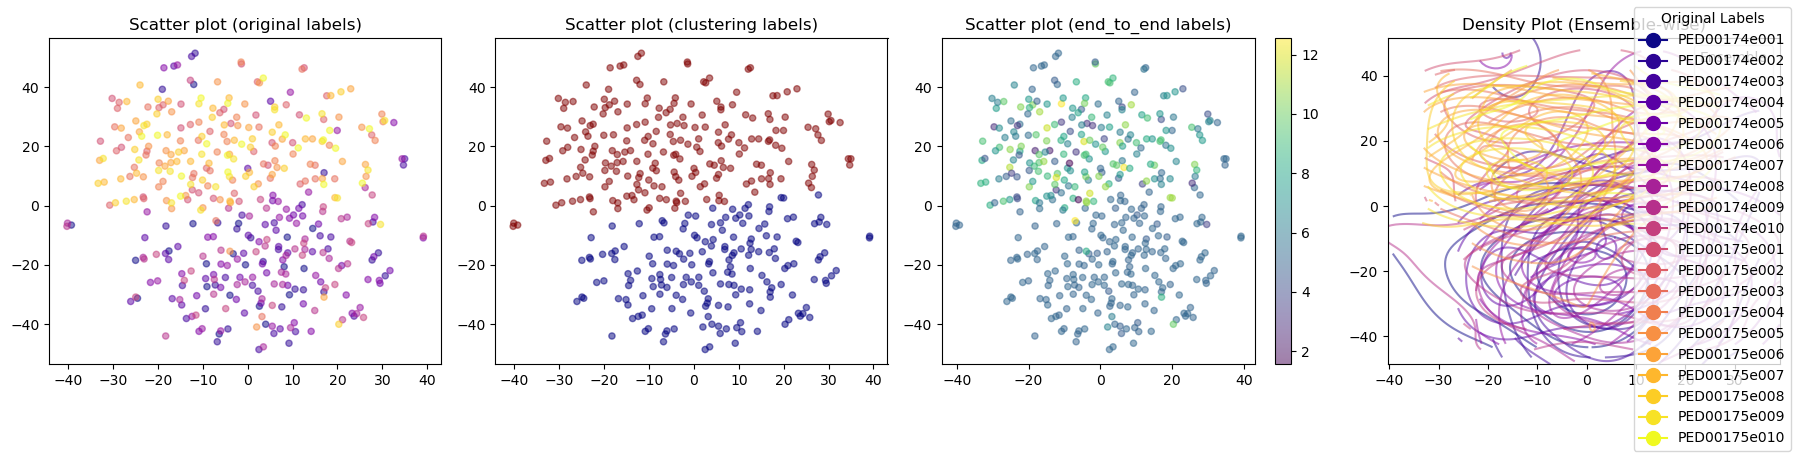

In [74]:

vis_PED.dimensionality_reduction_scatter(size=20,color_by='end_to_end', kde_by_ensemble=True);

<Axes: title={'center': 'Relative Content of H in Each Residue in the ensembles'}, xlabel='Residue Index', ylabel='Relative Content of Helix'>

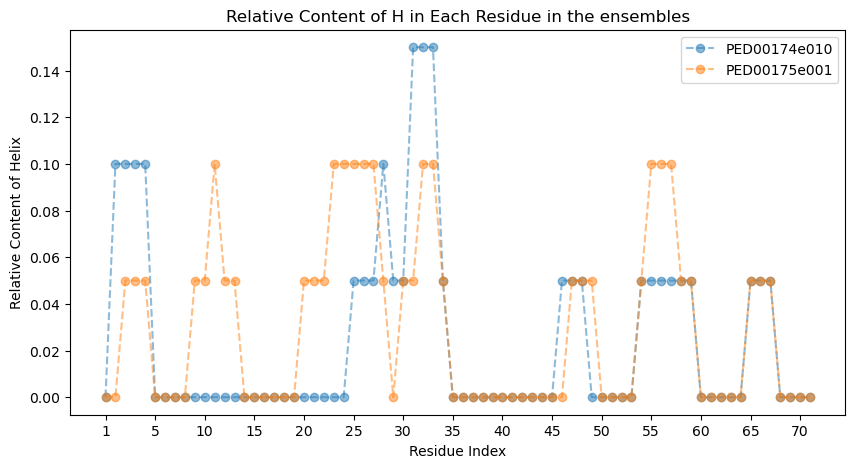

In [50]:
vis_PED.relative_dssp_content(dssp_code='H')

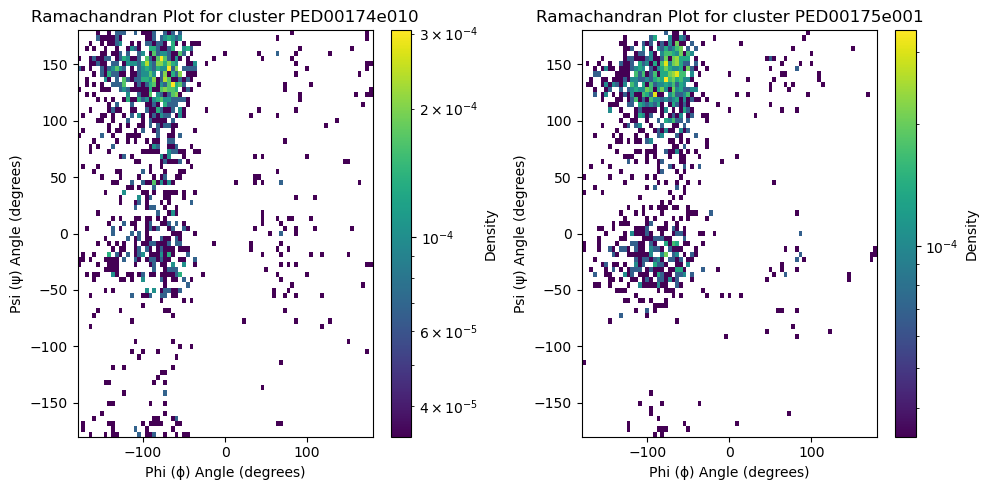

In [81]:

vis_PED.ramachandran_plots();

In [126]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import MDAnalysis as mda
from MDAnalysis.tests.datafiles import (PSF, DCD, DCD2, GRO, XTC,
                                        PSF_NAMD_GBIS, DCD_NAMD_GBIS,
                                        PDB_small, CRD)
from MDAnalysis.analysis import encore

In [161]:
u1 = mda.Universe(PSF, DCD)
u2 = mda.Universe(PSF, DCD2)



labels = ['test_1', 'test_2']

/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [172]:
analysis_PED.trajectories

{'test1': <mdtraj.Trajectory with 98 frames, 3341 atoms, 214 residues, without unitcells at 0x761a65ad1f10>,
 'test_2': <mdtraj.Trajectory with 102 frames, 3341 atoms, 214 residues, without unitcells at 0x761a65378110>}

In [174]:
ces, details = encore.hes( [u1,u2], align=True)

/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/MDAnalysis/coordinates/memory.py:535: DeprecationWarning: asel argument to timeseries will be renamed to'atomgroup' in 3.0, see #3911
  warnings.warn(


In [175]:
ces

array([[   0.        , 6794.03833736],
       [6794.03833736,    0.        ]])

In [157]:
import sys
import os
sys.path.append('/home/hamid/Desktop/EnsembleTools') # Add the path of the package to the system path for import (SHOULD BE DELETED!)
import matplotlib.pyplot as plt
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import Visualization
ens_codes_PED = [
    Ensemble(code= 'test1',data_path=DCD, top_path=PSF ), 
    Ensemble(code='test_2' ,data_path= DCD2, top_path=PSF), 

]
data_dir = '/home/hamid/PED_Data_analysis/nikola' 

analysis_PED = EnsembleAnalysis(ens_codes_PED, data_dir);
analysis_PED.load_trajectories(); 

vis_PED = Visualization(analysis=analysis_PED); 

Loading trajectory for test1...
dcdplugin) Warning: DCD header claims 500 frames, file size indicates there are actually 98 frames
Loading trajectory for test_2...


# Scoring 'jsd' using features 'ca_dist'
- Number of bins for all comparisons: 10
- Will perform: 1 (pairs of ensembles) x 1 (iterations) = 1 (comparisons)


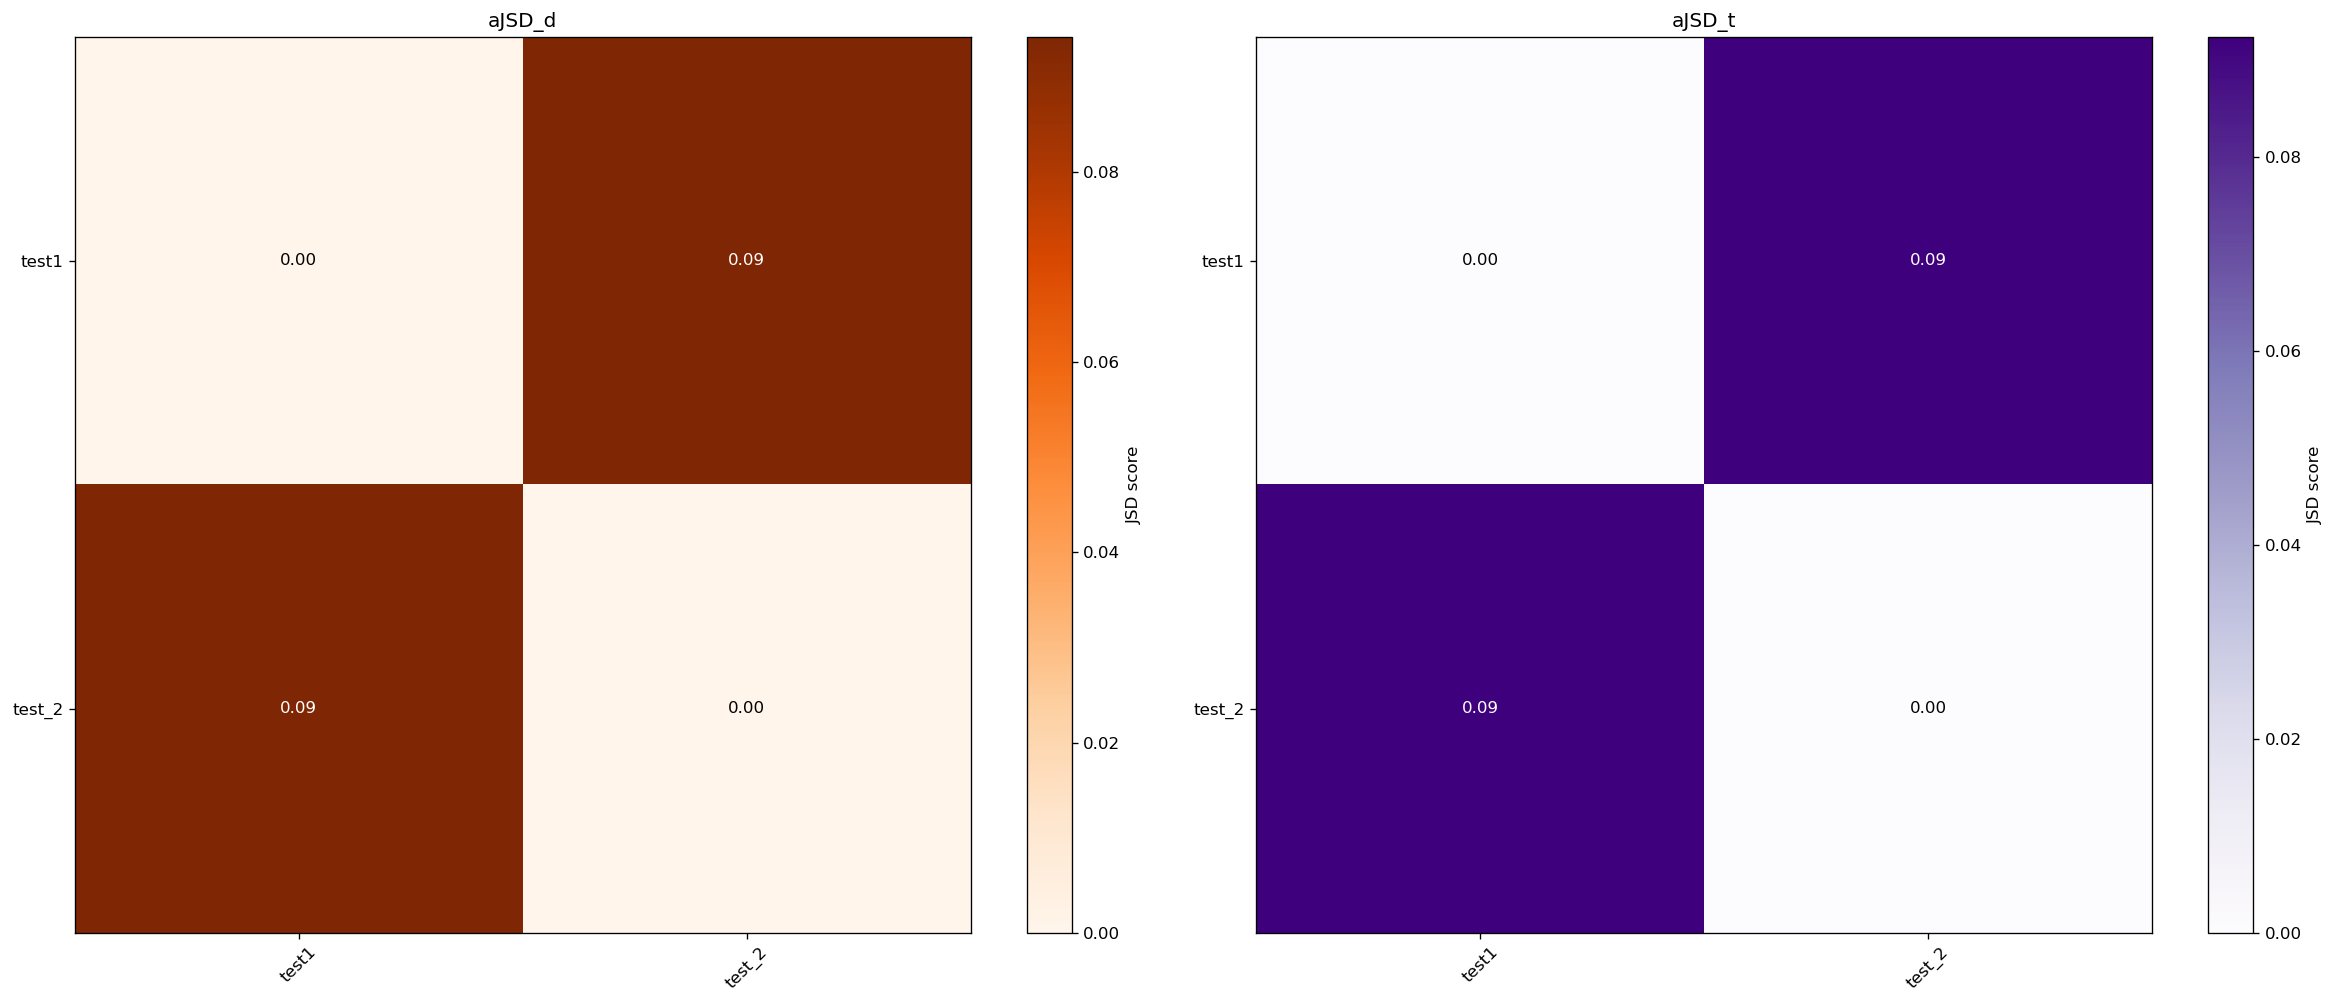

In [160]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20.0, 8), dpi=120) # making subplots to generate multiple ax figure

vis_PED.comparison_matrix(
    score="jsd", 
    feature="ca_dist", # Comparing the ensembls using the ditribution of distances between carbon alpha atoms
    bootstrap_iters=0,
    bins="auto",
    ax=ax[0], # using ax parameter you can decide how to put each subplot on the figure
    cmap="Oranges",
    verbose=True
)

vis_PED.comparison_matrix(
    score="jsd",
    feature="alpha_angle", # Comparing the ensembls using distribution of alpha angles
    bootstrap_iters=0,
    bins="auto",
    ax=ax[1],
    cmap="Purples",
    verbose=False
)

plt.tight_layout()
plt.show()

In [176]:
from constava import Constava
